In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Understanding User Demographics

In [2]:
user_demographics=pd.read_csv("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/survey_demographics.csv",index_col='Response ID')
user_demographics.head()

,DOB,Gender,Employment Duration,Industry,Profession,No of Employees in organization,Has children,Location,Weekly Remote work time(in %),Preferred weekly Remote work time(in %),Yearly Remote work time(in %),Preferred Yearly Remote work time(in %),Preferred Remote work time post Covid
Response ID,,,,,,,,,,,,,
1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Yes,Metro,50,80.0,50,80,80
2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,No,Metro,10,50.0,5,50,50
3,1978,Female,Less than 1 year,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Metro,100,100.0,90,90,60
4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,20-199,Yes,Regional,40,40.0,40,40,40
5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Yes,Regional,100,100.0,100,100,100


In [3]:
user_demographics.isna().sum()

DOB                                        0
Gender                                     0
Employment Duration                        0
Industry                                   0
Profession                                 0
No of Employees in organization            0
Has children                               0
Location                                   0
Weekly Remote work time(in %)              0
Preferred weekly Remote work time(in %)    1
Yearly Remote work time(in %)              0
Preferred Yearly Remote work time(in %)    0
Preferred Remote work time post Covid      0
dtype: int64

In [4]:
user_demographics=user_demographics.dropna(axis='index',how='any')
user_demographics.isna().sum()

DOB                                        0
Gender                                     0
Employment Duration                        0
Industry                                   0
Profession                                 0
No of Employees in organization            0
Has children                               0
Location                                   0
Weekly Remote work time(in %)              0
Preferred weekly Remote work time(in %)    0
Yearly Remote work time(in %)              0
Preferred Yearly Remote work time(in %)    0
Preferred Remote work time post Covid      0
dtype: int64

In [5]:
current_year=datetime.now().year
user_demographics['Age']=current_year-user_demographics['DOB']
user_demographics['Age'].head()

Response ID
1    48
2    53
3    46
4    62
5    50
Name: Age, dtype: int64

In [6]:
bins = [0, 18, 30, 50, float('inf')]
labels = ['0-18', '19-30', '31-50', '51+']
age_groups=pd.cut(user_demographics['Age'], bins=bins, labels=labels, right=False).value_counts()
age_groups=pd.DataFrame(age_groups).reset_index()
age_groups.sort_values(by='Age',inplace=True)
age_groups

,Age,count
3,0-18,0
2,19-30,159
0,31-50,820
1,51+,532


In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [8]:
plt.style.use('Solarize_Light2')

In [9]:
gender_distribution = pd.DataFrame(user_demographics['Gender'].value_counts()).reset_index()
small_values = gender_distribution[gender_distribution['count'] <= 5]
other_count = small_values['count'].sum()
gender_distribution = gender_distribution.drop(small_values.index)
gender_distribution.loc[len(gender_distribution)] = ['Other', other_count]
gender_distribution

,Gender,count
0,Female,785
1,Male,722
2,Other,4


In [10]:
Industry_df=pd.DataFrame(user_demographics['Industry'].value_counts()).reset_index()
Industry_df.sort_values(by='count',ascending=True,inplace=True)
Industry_df.head()

,Industry,count
18,"Agriculture, Forestry and Fishing",14
17,Mining,15
16,"Rental, Hiring and Real Estate",22
15,Accommodation and Food,27
14,"Electricity, Gas, Water and Waste",28


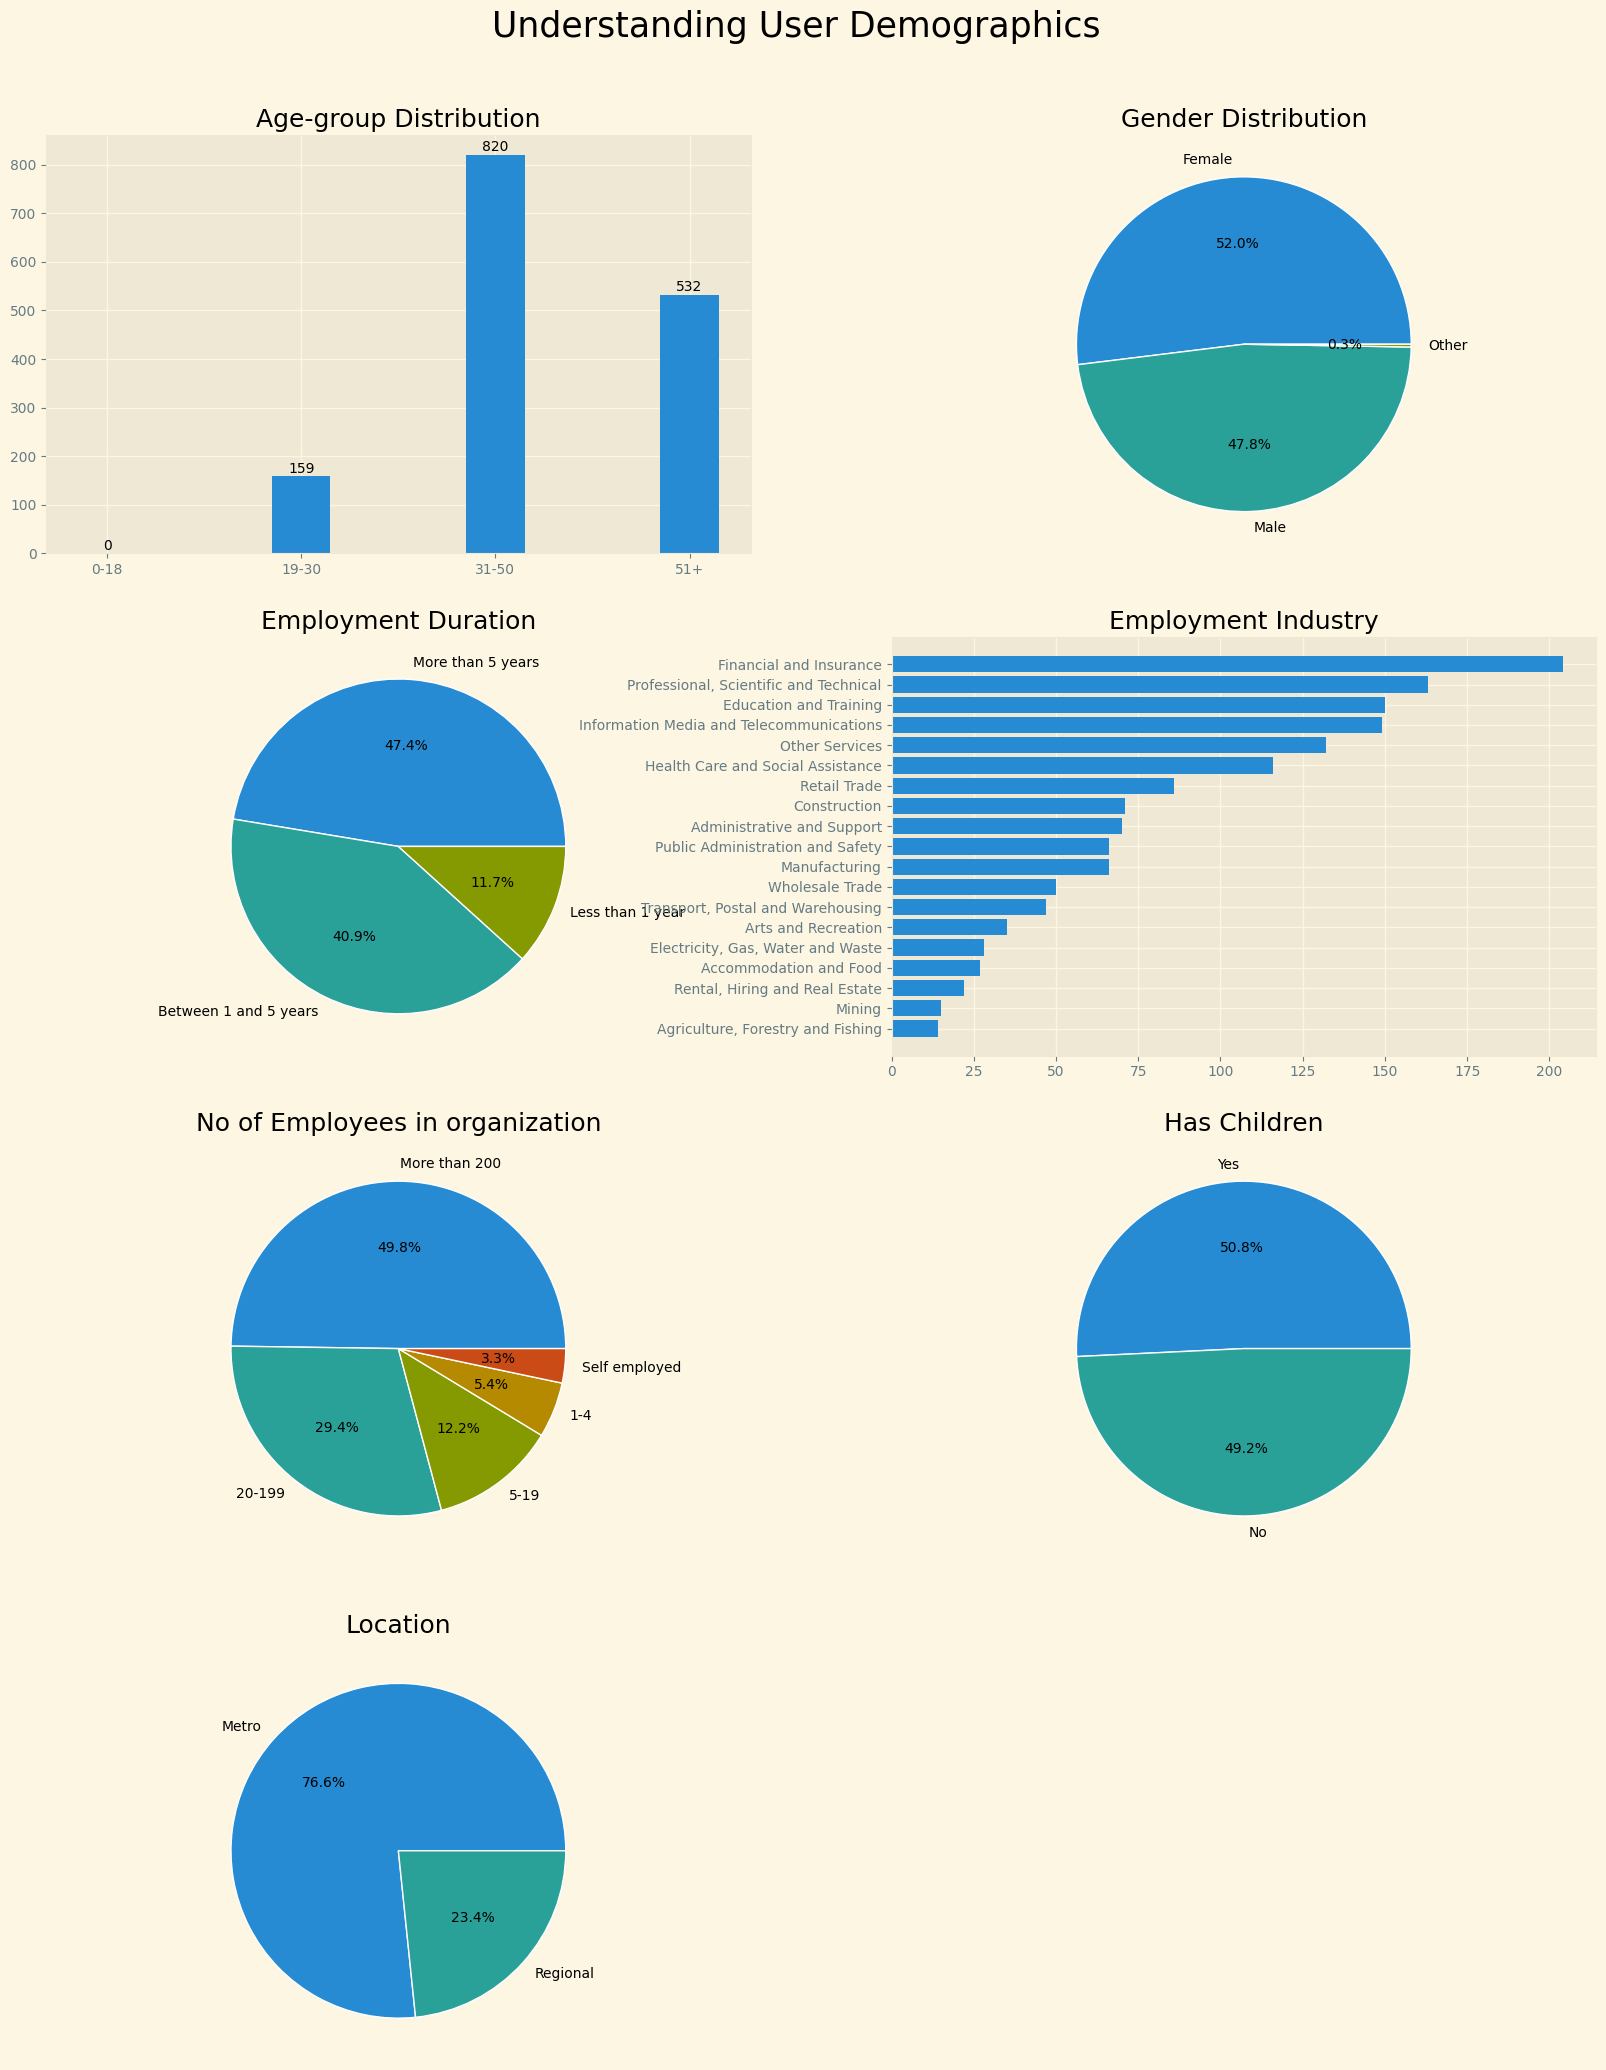

In [11]:
ages=age_groups['Age']
age_counts=age_groups['count']

g_slices=gender_distribution['count']
g_labels=gender_distribution['Gender']

Employment_Duration_df=user_demographics['Employment Duration'].value_counts()
e_labels=Employment_Duration_df.index


Industry=Industry_df['Industry']
Industry_counts=Industry_df['count']

employee_counts = user_demographics['No of Employees in organization'].value_counts()
ec_labels = employee_counts.index

children=user_demographics['Has children'].value_counts()
c_labels=children.index

location=user_demographics['Location'].value_counts()
l_labels=location.index


fig,axs=plt.subplots(4,2,figsize=(20,25))

axs[0,0].bar(ages,age_counts,width=0.3)
for i, count in enumerate(age_counts):
    axs[0,0].text(i, count + 1, str(count), ha='center', va='bottom')
axs[0,0].set_title('Age-group Distribution',size=18)

axs[0,1].pie(g_slices,labels=g_labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,1].set_title('Gender Distribution',size=18)

axs[1,0].pie(Employment_Duration_df,labels=e_labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,0].set_title('Employment Duration',size=18)

axs[1,1].barh(Industry,Industry_counts)
axs[1,1].set_title('Employment Industry',size=18)

axs[2,0].pie(employee_counts, labels=ec_labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
axs[2,0].set_title('No of Employees in organization',size=18)

axs[2,1].pie(children, labels=c_labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
axs[2,1].set_title('Has Children',size=18)

axs[3,0].pie(location, labels=l_labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
axs[3,0].set_title('Location',size=18)
axs[3,1].axis('off')

plt.suptitle('Understanding User Demographics',size=25,y=0.93)
# plt.tight_layout()
plt.show()

Understanding Survey scenario

In [12]:
survey_scenario_df=pd.read_excel("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/Understanding user_scenario.xlsx")
survey_scenario_df.head()

,Employee is satisfied with work policy,Employee chooses remote work time,Employee chooses remote work days,Remote working scenario is common,Easy permission for remote work,Collaboration was easy in remote work,Working remotely reduces my chances of promotion,I take more regular breaks while working remotely,Remote working is a positive or a negative for your employer,Employer likely to encourage more remote working post Covid,Employer likely to make changes to support remote working,I would have more choice about whether I work remotely
0,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Strongly Positive,Somewhat likely,Somewhat likely,Somewhat likely
1,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat Negative,Neither unlikely or likely,Neither unlikely or likely,Neither unlikely or likely
2,Strongly agree,Neither agree nor disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Somewhat Positive,Somewhat unlikely,Somewhat likely,Very likely
3,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat Negative,Somewhat likely,Somewhat likely,Somewhat likely
4,Strongly agree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Neither agree nor disagree,Somewhat agree,Strongly Positive,Somewhat likely,Somewhat likely,Somewhat likely


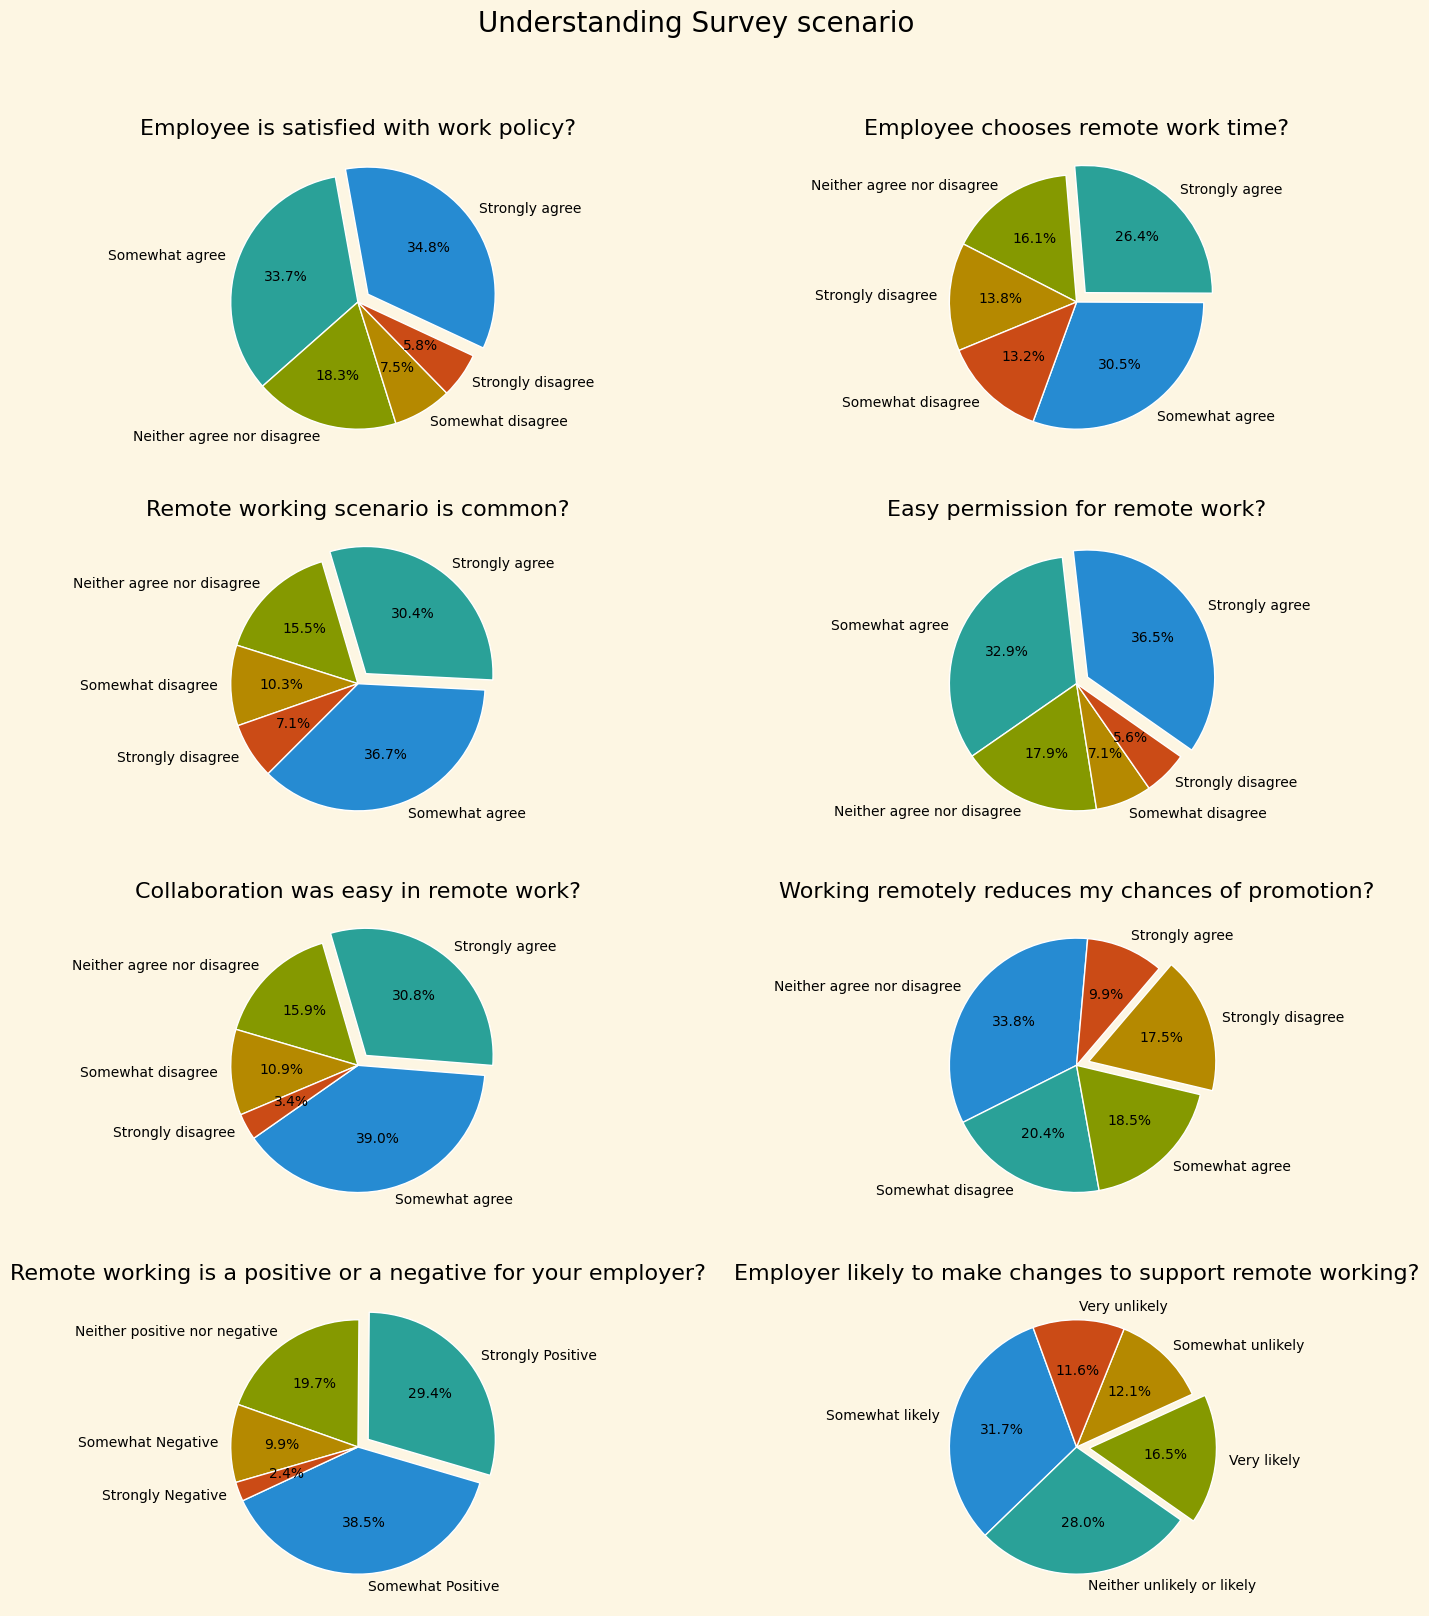

In [13]:
employee_satisfaction=survey_scenario_df['Employee is satisfied with work policy'].value_counts()
choose_work_time=survey_scenario_df['Employee chooses remote work time'].value_counts()
remote_common=survey_scenario_df['Remote working scenario is common'].value_counts()
easy_permission=survey_scenario_df['Easy permission for remote work'].value_counts()
easy_collaboration=survey_scenario_df['Collaboration was easy in remote work'].value_counts()
promotion_chances=survey_scenario_df['Working remotely reduces my chances of promotion'].value_counts()
employer_perspective=survey_scenario_df['Remote working is a positive or a negative for your employer'].value_counts()
support_remote=survey_scenario_df['Employer likely to make changes to support remote working'].value_counts()


fig,axs=plt.subplots(4,2,figsize=(17,19))

axs[0,0].pie(employee_satisfaction,labels=employee_satisfaction.index,explode=[0.1,0,0,0,0],startangle=-25,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,0].set_title('Employee is satisfied with work policy?')

axs[0,1].pie(choose_work_time,labels=choose_work_time.index,explode=[0,0.1,0,0,0],startangle=-110,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,1].set_title('Employee chooses remote work time?')

axs[1,0].pie(remote_common,labels=remote_common.index,explode=[0,0.1,0,0,0],startangle=-135,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,0].set_title('Remote working scenario is common?')

axs[1,1].pie(easy_permission,labels=easy_permission.index,explode=[0.1,0,0,0,0],startangle=-35,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,1].set_title('Easy permission for remote work?')

axs[2,0].pie(easy_collaboration,labels=easy_collaboration.index,explode=[0,0.1,0,0,0],startangle=-145,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[2,0].set_title('Collaboration was easy in remote work?')

axs[2,1].pie(promotion_chances,labels=promotion_chances.index,explode=[0,0,0,0.1,0],startangle=85,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[2,1].set_title('Working remotely reduces my chances of promotion?')

axs[3,0].pie(employer_perspective,labels=employer_perspective.index,explode=[0,0.1,0,0,0],startangle=-155,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[3,0].set_title('Remote working is a positive or a negative for your employer?')

axs[3,1].pie(support_remote,labels=support_remote.index,explode=[0,0,0.1,0,0],startangle=110,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[3,1].set_title('Employer likely to make changes to support remote working?')

plt.suptitle('Understanding Survey scenario',size=20,y=0.95)
# plt.tight_layout()
plt.show()

Remote Work

In [14]:
user_demographics.head()

,DOB,Gender,Employment Duration,Industry,Profession,No of Employees in organization,Has children,Location,Weekly Remote work time(in %),Preferred weekly Remote work time(in %),Yearly Remote work time(in %),Preferred Yearly Remote work time(in %),Preferred Remote work time post Covid,Age
Response ID,,,,,,,,,,,,,,
1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Yes,Metro,50,80.0,50,80,80,48
2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,No,Metro,10,50.0,5,50,50,53
3,1978,Female,Less than 1 year,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Metro,100,100.0,90,90,60,46
4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,20-199,Yes,Regional,40,40.0,40,40,40,62
5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Yes,Regional,100,100.0,100,100,100,50


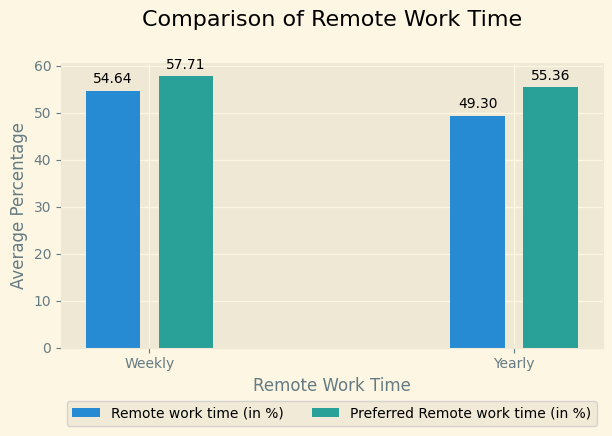

In [15]:
y1 = user_demographics['Weekly Remote work time(in %)'].mean()
y2 = user_demographics['Yearly Remote work time(in %)'].mean()
y3 = user_demographics['Preferred weekly Remote work time(in %)'].mean()
y4 = user_demographics['Preferred Yearly Remote work time(in %)'].mean()

x_indexes = np.array([0, 1])
width = 0.15
group_gap = 0.05

plt.bar(x_indexes, [y1, y2], width=width, label='Remote work time (in %)')
plt.bar(x_indexes + width + group_gap, [y3, y4], width=width, label='Preferred Remote work time (in %)')

for i, y in enumerate([y1, y2, y3, y4]):
    plt.text(i % 2 + i // 2 * (width + group_gap), y + 1, f'{y:.2f}', ha='center', va='bottom')

plt.xticks(ticks=x_indexes + (width + group_gap) / 2, labels=['Weekly', 'Yearly'])
plt.xlabel('Remote Work Time')
plt.ylabel('Average Percentage')
plt.title('Comparison of Remote Work Time',y=1.1)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.tight_layout()
plt.show()

In [16]:
remote_work=user_demographics.nlargest(100,'Yearly Remote work time(in %)')
preferred_work=user_demographics.nlargest(100,'Preferred Yearly Remote work time(in %)')

In [17]:
bins = [0, 18, 30, 50, float('inf')]
labels = ['0-18', '19-30', '31-50', '51+']
remote_age_groups=pd.cut(remote_work['Age'], bins=bins, labels=labels, right=False).value_counts()
remote_age_groups=pd.DataFrame(remote_age_groups).reset_index()
remote_age_groups.sort_values(by='Age',inplace=True)
remote_age_groups.drop(index=3,inplace=True)

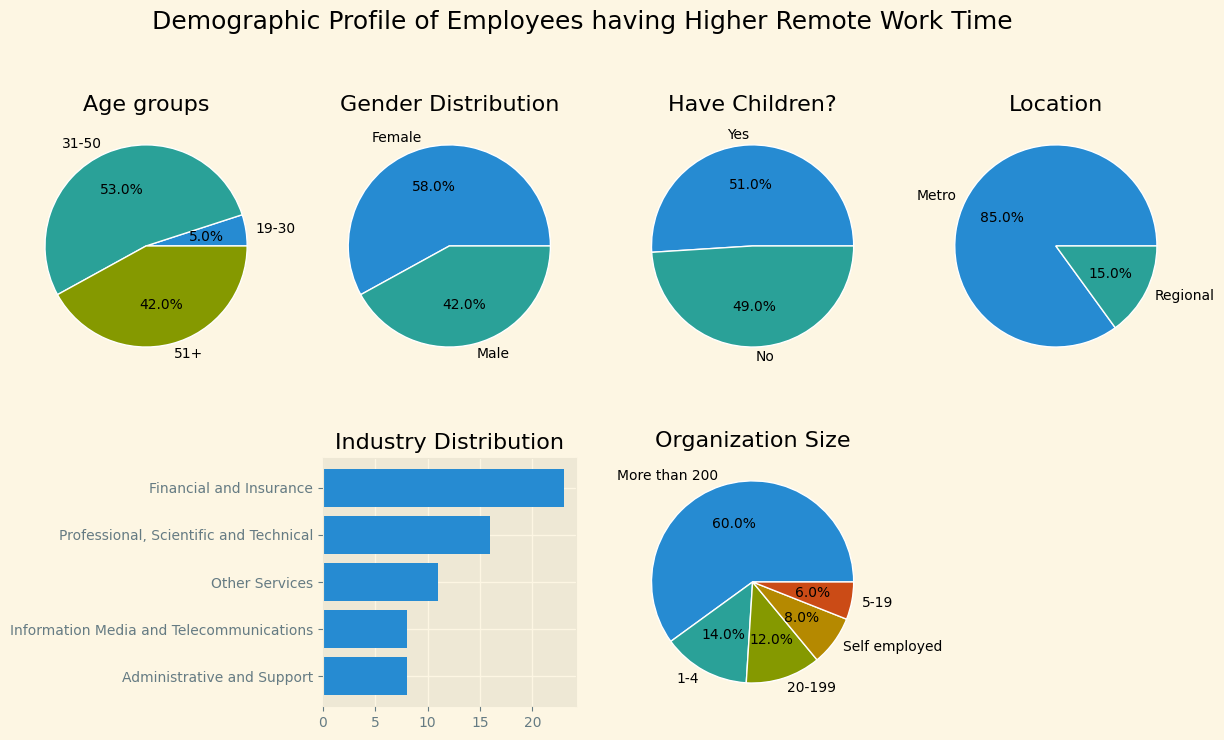

In [18]:
nlargest_gender=remote_work['Gender'].value_counts()
nlargest_children=remote_work['Has children'].value_counts()
nlargest_location=remote_work['Location'].value_counts()
nlargest_industry=pd.DataFrame(remote_work['Industry'].value_counts()).sort_values('count')
nlargest_industry=nlargest_industry.nlargest(5,'count').sort_values('count')
nlargest_organization_size=remote_work['No of Employees in organization'].value_counts()

fig,axs=plt.subplots(2,4,figsize=(15,8))
axs[0,0].pie(remote_age_groups['count'],labels=remote_age_groups['Age'],autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,0].set_title('Age groups')

axs[0,1].pie(nlargest_gender,labels=nlargest_gender.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,1].set_title('Gender Distribution')

axs[0,2].pie(nlargest_children,labels=nlargest_children.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,2].set_title('Have Children?')

axs[0,3].pie(nlargest_location,labels=nlargest_location.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,3].set_title('Location')

axs[1,1].barh(nlargest_industry.index,nlargest_industry['count'])
axs[1,1].set_title('Industry Distribution')
axs[1,1].set_aspect(aspect=4.5)

axs[1,2].pie(nlargest_organization_size,labels=nlargest_organization_size.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,2].set_title('Organization Size')

axs[1,0].axis('off')
axs[1,3].axis('off')

plt.suptitle('Demographic Profile of Employees having Higher Remote Work Time',size=18,y=1)
plt.show()

In [19]:
bins = [0, 18, 30, 50, float('inf')]
labels = ['0-18', '19-30', '31-50', '51+']
p_remote_age_groups=pd.cut(preferred_work['Age'], bins=bins, labels=labels, right=False).value_counts()
p_remote_age_groups=pd.DataFrame(p_remote_age_groups).reset_index()
p_remote_age_groups.sort_values(by='Age',inplace=True)
p_remote_age_groups.drop(index=3,inplace=True)
p_remote_age_groups

,Age,count
2,19-30,4
1,31-50,47
0,51+,49


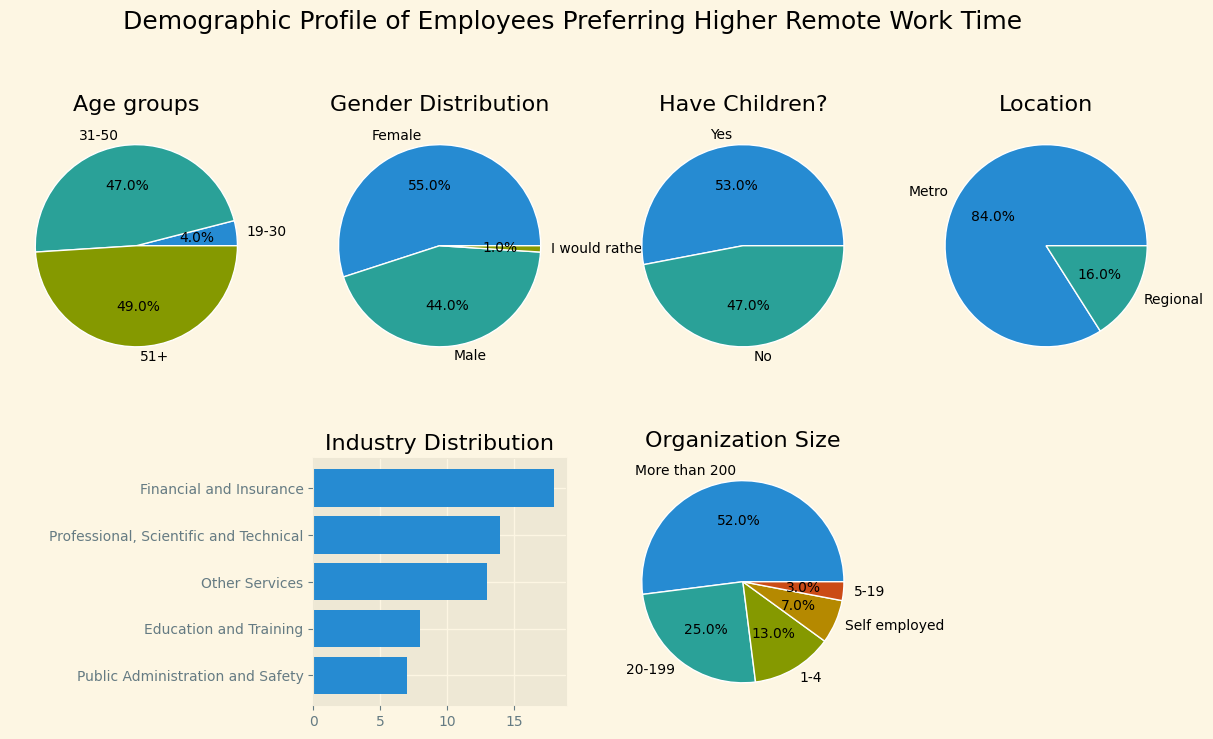

In [20]:
p_nlargest_gender=preferred_work['Gender'].value_counts()
p_nlargest_children=preferred_work['Has children'].value_counts()
p_nlargest_location=preferred_work['Location'].value_counts()
p_nlargest_industry=pd.DataFrame(preferred_work['Industry'].value_counts()).sort_values('count')
p_nlargest_industry=p_nlargest_industry.nlargest(5,'count').sort_values('count')
p_nlargest_organization_size=preferred_work['No of Employees in organization'].value_counts()

fig,axs=plt.subplots(2,4,figsize=(15,8))
axs[0,0].pie(p_remote_age_groups['count'],labels=p_remote_age_groups['Age'],autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,0].set_title('Age groups')

axs[0,1].pie(p_nlargest_gender,labels=p_nlargest_gender.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,1].set_title('Gender Distribution')

axs[0,2].pie(p_nlargest_children,labels=p_nlargest_children.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,2].set_title('Have Children?')

axs[0,3].pie(p_nlargest_location,labels=p_nlargest_location.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,3].set_title('Location')

axs[1,1].barh(p_nlargest_industry.index,p_nlargest_industry['count'])
axs[1,1].set_title('Industry Distribution')
axs[1,1].set_aspect(aspect=3.5)

axs[1,2].pie(p_nlargest_organization_size,labels=p_nlargest_organization_size.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,2].set_title('Organization Size')

axs[1,0].axis('off')
axs[1,3].axis('off')

plt.suptitle('Demographic Profile of Employees Preferring Higher Remote Work Time',size=18,y=1)
plt.show()

Advantages of Remote Work

In [21]:
adv_remote_df=pd.read_excel("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/benefits of remote work.xlsx")
adv_remote_df

,Benefit of remote work,Percentage
0,Ability to have a flexible schedule,32
1,Flexibility to work from any location,26
2,Not having to commute,21
3,Ability to spend time with family,11
4,Ability to work from home,7
5,Other,3


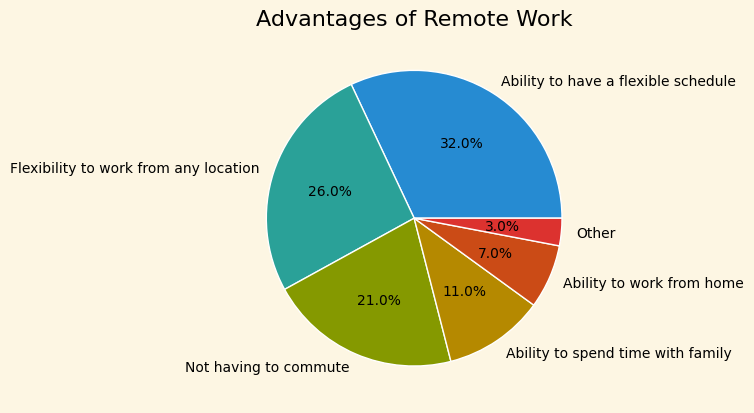

In [22]:
plt.pie(adv_remote_df['Percentage'],labels=adv_remote_df['Benefit of remote work'],autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
plt.title('Advantages of Remote Work')
plt.show()

Time Spent

In [23]:
time_distribution_df=pd.read_csv("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/time saved.csv")
time_distribution_df.head()

,Onsite-Prepare for work and commute,On site-Work time,Onsite-Domestic responsibilities,Onsite-Personal and family time,Onsite-Sleep,Remote-Preparing for work and commuting,Remote - Working time,Remote-Domestic responsibilities,Remote-Personal and family time,Remote-Sleep,Remote work with salary cuts
0,2.0,6.0,1.0,7.0,8.0,0.0,8.0,1.0,7.0,8.0,No
1,1.5,8.0,2.0,6.0,6.5,0.0,10.0,4.0,4.0,6.0,No
2,3.0,8.0,1.0,4.0,8.0,1.0,8.0,2.0,5.0,8.0,Yes
3,1.0,8.0,6.0,3.0,6.0,1.0,8.0,4.0,4.0,7.0,No
4,5.0,8.0,2.0,3.0,6.0,50.0,9.0,3.0,4.0,8.0,No


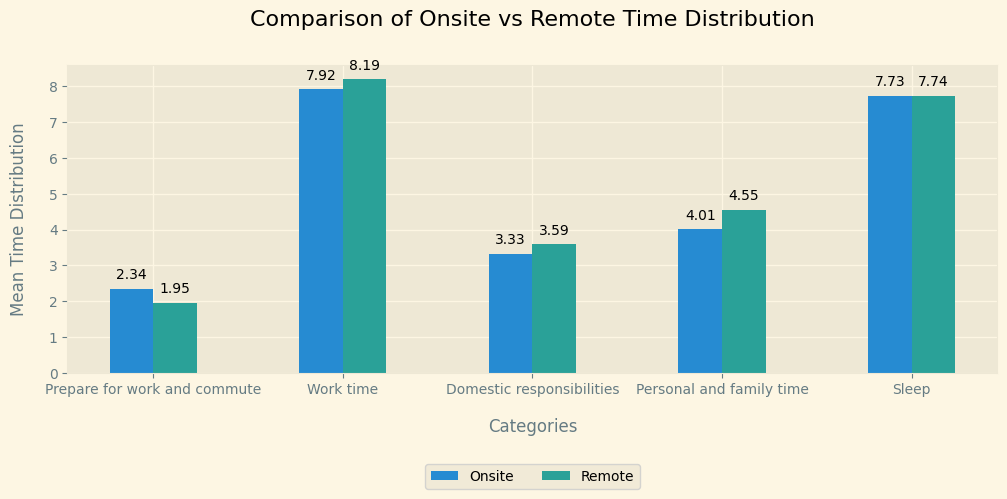

In [24]:
onsite_prepare=time_distribution_df['Onsite-Prepare for work and commute'].mean()
remote_prepare=time_distribution_df['Remote-Preparing for work and commuting'].mean()
onsite_Worktime=time_distribution_df['On site-Work time'].mean()
remote_Worktime=time_distribution_df['Remote - Working time'].mean()
onsite_Domestic=time_distribution_df['Onsite-Domestic responsibilities'].mean()
remote_Domestic=time_distribution_df['Remote-Domestic responsibilities'].mean()
onsite_Personal=time_distribution_df['Onsite-Personal and family time'].mean()
remote_Personal=time_distribution_df['Remote-Personal and family time'].mean()
onsite_Sleep=time_distribution_df['Onsite-Sleep'].mean()
remote_Sleep=time_distribution_df['Remote-Sleep'].mean()


x_indexes=np.array([0,1,2,3,4])
width=0.23
plt.figure(figsize=(12,4))
plt.bar(x_indexes,[onsite_prepare,onsite_Worktime,onsite_Domestic,onsite_Personal,onsite_Sleep],width=width,label='Onsite')
plt.bar(x_indexes+width,[remote_prepare,remote_Worktime,remote_Domestic,remote_Personal,remote_Sleep],width=width,label='Remote')

plt.xticks(ticks=x_indexes+width/2,labels=['Prepare for work and commute', 'Work time', 'Domestic responsibilities', 'Personal and family time', 'Sleep'])

for i, val in enumerate([onsite_prepare, onsite_Worktime, onsite_Domestic, onsite_Personal, onsite_Sleep]):
    plt.text(i, val + 0.2, f'{val:.2f}', ha='center', va='bottom')
for i, val in enumerate([remote_prepare, remote_Worktime, remote_Domestic, remote_Personal, remote_Sleep]):
    plt.text(i + width, val + 0.2, f'{val:.2f}', ha='center', va='bottom')
    
plt.xlabel('Categories',labelpad=15)
plt.ylabel('Mean Time Distribution',labelpad=15)
plt.title('Comparison of Onsite vs Remote Time Distribution',y=1.1)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=2)
# plt.tight_layout()
plt.show()


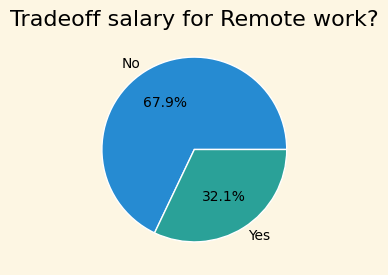

In [25]:
remote_salarycuts=time_distribution_df['Remote work with salary cuts'].value_counts()
plt.figure(figsize=(5,3))
plt.pie(remote_salarycuts,labels=remote_salarycuts.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
plt.title('Tradeoff salary for Remote work?')
plt.show()

Disadvantages of Remote Work

In [26]:
disadvantages_remote_df=pd.read_excel("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/barriers to remote work.xlsx")
disadvantages_remote_df.head()

,Interruptions,Connectivity-internet,Difficulty collaborating remotely,Feeling isolated,Extra costs,Motivation,Management discourages remote working,Health and safety
0,Lack of privacy,Somewhat improved,Somewhat improved,Somewhat improved,Somewhat improved,Stayed about the same,Stayed about the same,Somewhat improved
1,Noisy work environment,Somewhat improved,Somewhat improved,Somewhat improved,Somewhat improved,Stayed about the same,Stayed about the same,Stayed about the same
2,NaN,Stayed about the same,Stayed about the same,Stayed about the same,Stayed about the same,Somewhat improved,Stayed about the same,Stayed about the same
3,Lack of privacy,Somewhat improved,Stayed about the same,Significantly worsened,Significantly worsened,Significantly worsened,Significantly worsened,Significantly worsened
4,NaN,Stayed about the same,Stayed about the same,Stayed about the same,Stayed about the same,Stayed about the same,Somewhat worsened,Stayed about the same


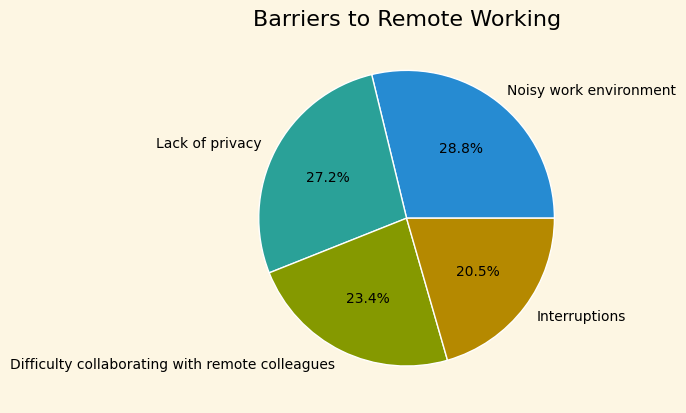

In [27]:
remote_div=disadvantages_remote_df[' Interruptions '].value_counts()
plt.pie(remote_div,labels=remote_div.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
plt.title('Barriers to Remote Working')
plt.show()

In [28]:
concerns_remote_df=pd.read_csv("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/remote work concerns.csv",index_col='Concerns About Remote Working')
concerns_remote_df.head()

,Total
Concerns About Remote Working,
Others in the company won’t think I’m working as hard as them,314
I might end up working longer,285
I don’t trust myself to get started/stay focussed,166


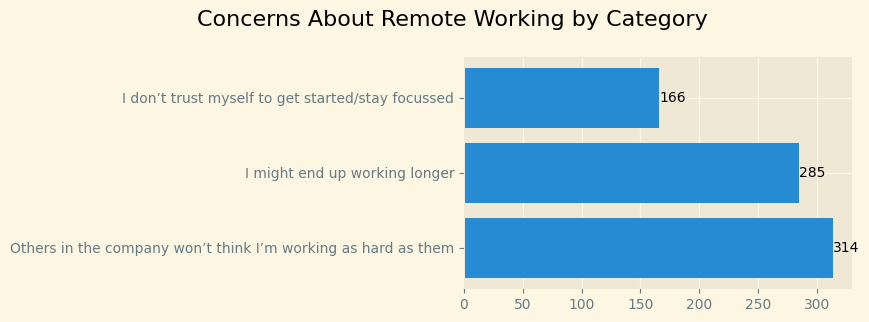

In [29]:
categories = concerns_remote_df.index
total_values = concerns_remote_df['Total']

plt.figure(figsize=(5,3))
plt.barh(categories, total_values)
for index, value in enumerate(total_values):
    plt.text(value, index, str(value), va='center')
plt.title('Concerns About Remote Working by Category',y=1.1,x=-0.03)
# plt.tight_layout()
plt.show()

Improvement

In [30]:
disadvantages_remote_df.columns

Index([' Interruptions ', 'Connectivity-internet',
       'Difficulty collaborating remotely', 'Feeling isolated', 'Extra costs',
       'Motivation', 'Management discourages remote working',
       'Health and safety '],
      dtype='object')

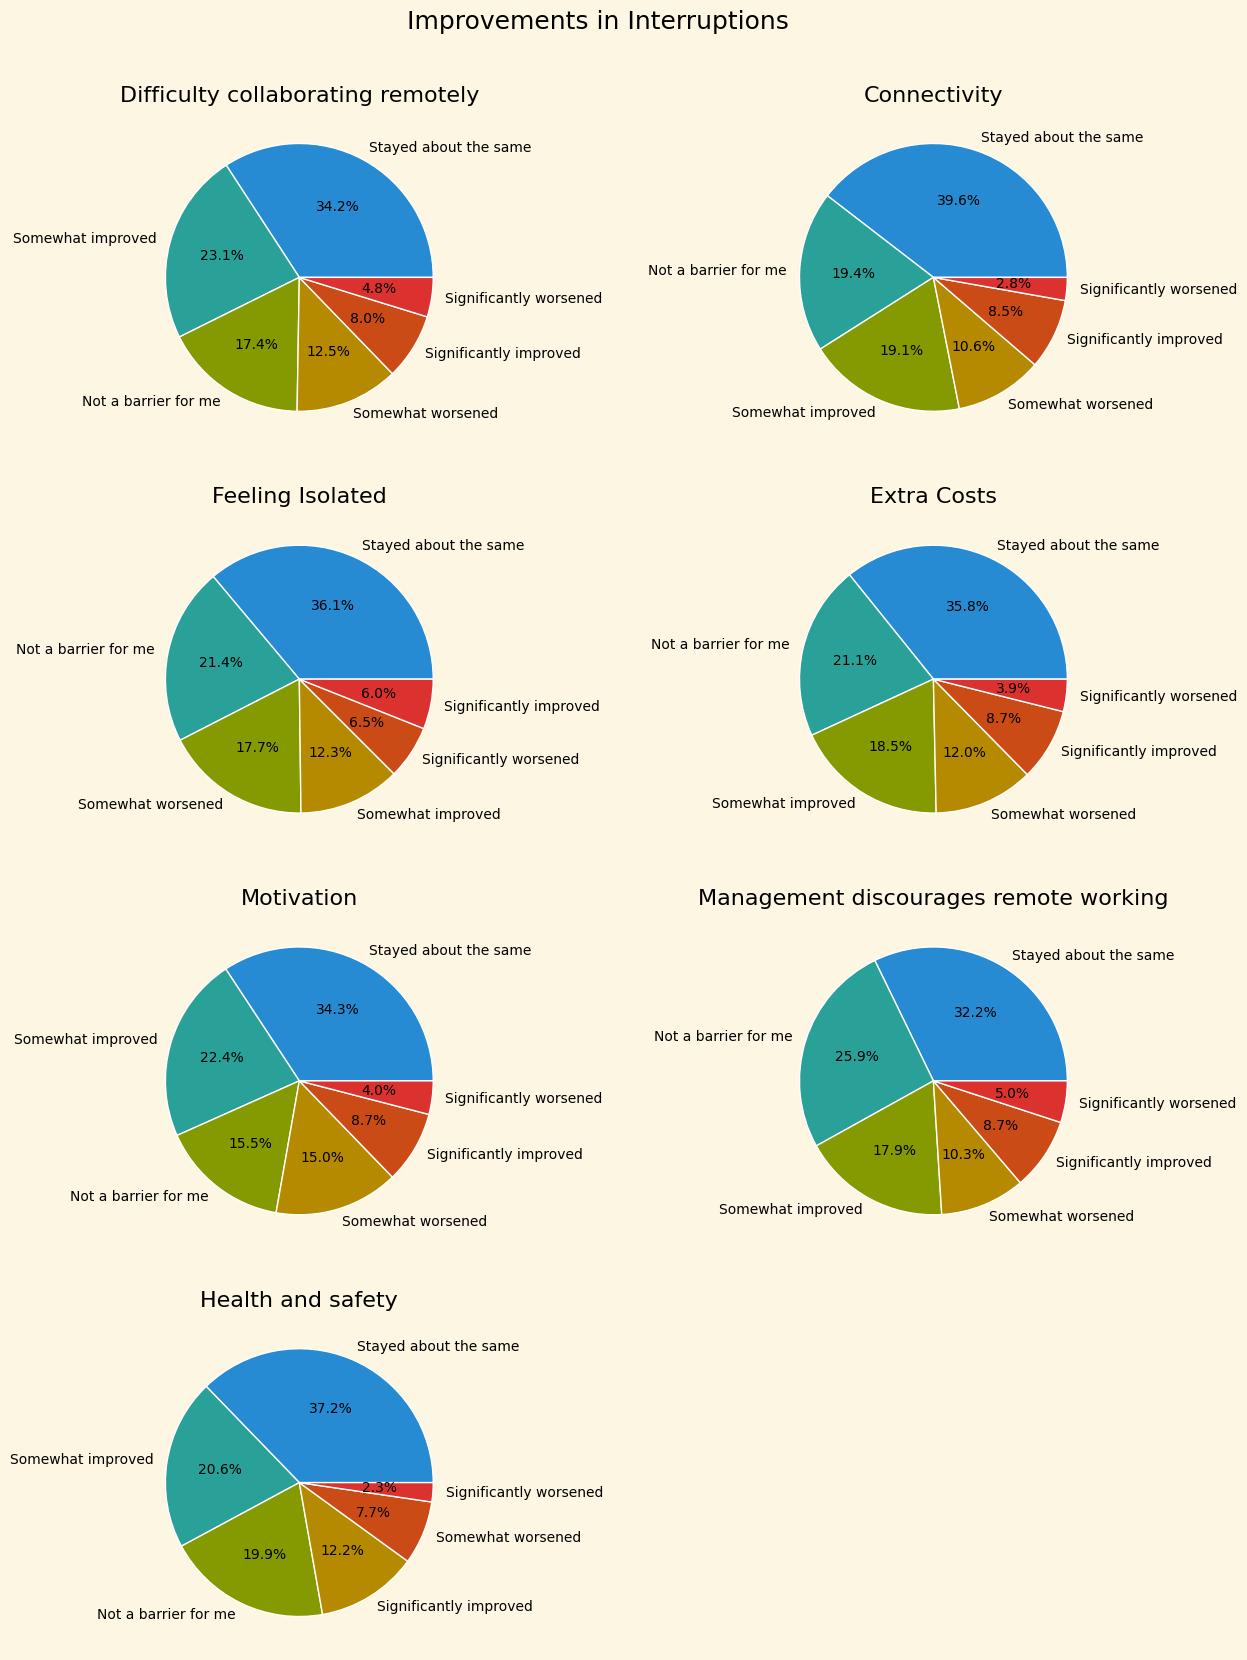

In [31]:
collaboration=disadvantages_remote_df['Difficulty collaborating remotely'].value_counts()
connectivity=disadvantages_remote_df['Connectivity-internet'].value_counts()
isolation=disadvantages_remote_df['Feeling isolated'].value_counts()
extra_costs=disadvantages_remote_df['Extra costs'].value_counts()
Motivation=disadvantages_remote_df['Motivation'].value_counts()
management=disadvantages_remote_df['Management discourages remote working'].value_counts()
Health=disadvantages_remote_df['Health and safety '].value_counts()

fig,axs=plt.subplots(4,2,figsize=(15,20))
axs[0,0].pie(collaboration,labels=collaboration.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,0].set_title('Difficulty collaborating remotely')

axs[0,1].pie(connectivity,labels=connectivity.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,1].set_title('Connectivity')

axs[1,0].pie(isolation,labels=isolation.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,0].set_title('Feeling Isolated')

axs[1,1].pie(extra_costs,labels=extra_costs.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,1].set_title('Extra Costs')

axs[2,0].pie(Motivation,labels=Motivation.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[2,0].set_title('Motivation')

axs[2,1].pie(management,labels=management.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[2,1].set_title('Management discourages remote working')

axs[3,0].pie(Health,labels=Health.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[3,0].set_title('Health and safety')

axs[3,1].axis('off')


plt.suptitle('Improvements in Interruptions',size=18,y=0.93)
plt.show()

### Impacts of Remote Work

In [32]:
impacts_df=pd.read_csv("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/impacts of remote work.csv",index_col='Response ID')
impacts_df.head()

,Have you ever experienced working from home?,Do you think that working from home increases your work productivity?,Do you think that working from home gives you more flexibility?,Do you think that working from home saves you more time?,"Which work type has the potential to cause you physical problems, such as the neck, back, and leg pain?","Which work type has the potential to cause mental disorders, such as stress, anxiety, and depression?",Which work type keeps you focused while working?,Which work type do you prefer the most?
Response ID,,,,,,,,
1,Yes,No,Yes,No,Working from home,Working from home,Working from home,A mixed mode of working
2,Yes,Yes,Yes,No,Working from home,Working from home,Working from home,Working from home
3,No,Yes,Yes,No,Working from home,Working in an office,Working in an office,Working in an office
4,Yes,Yes,Yes,No,Working in an office,Working from home,Working in an office,Working from home
5,Yes,No,Yes,Yes,Working in an office,Working in an office,Working from home,Working in an office


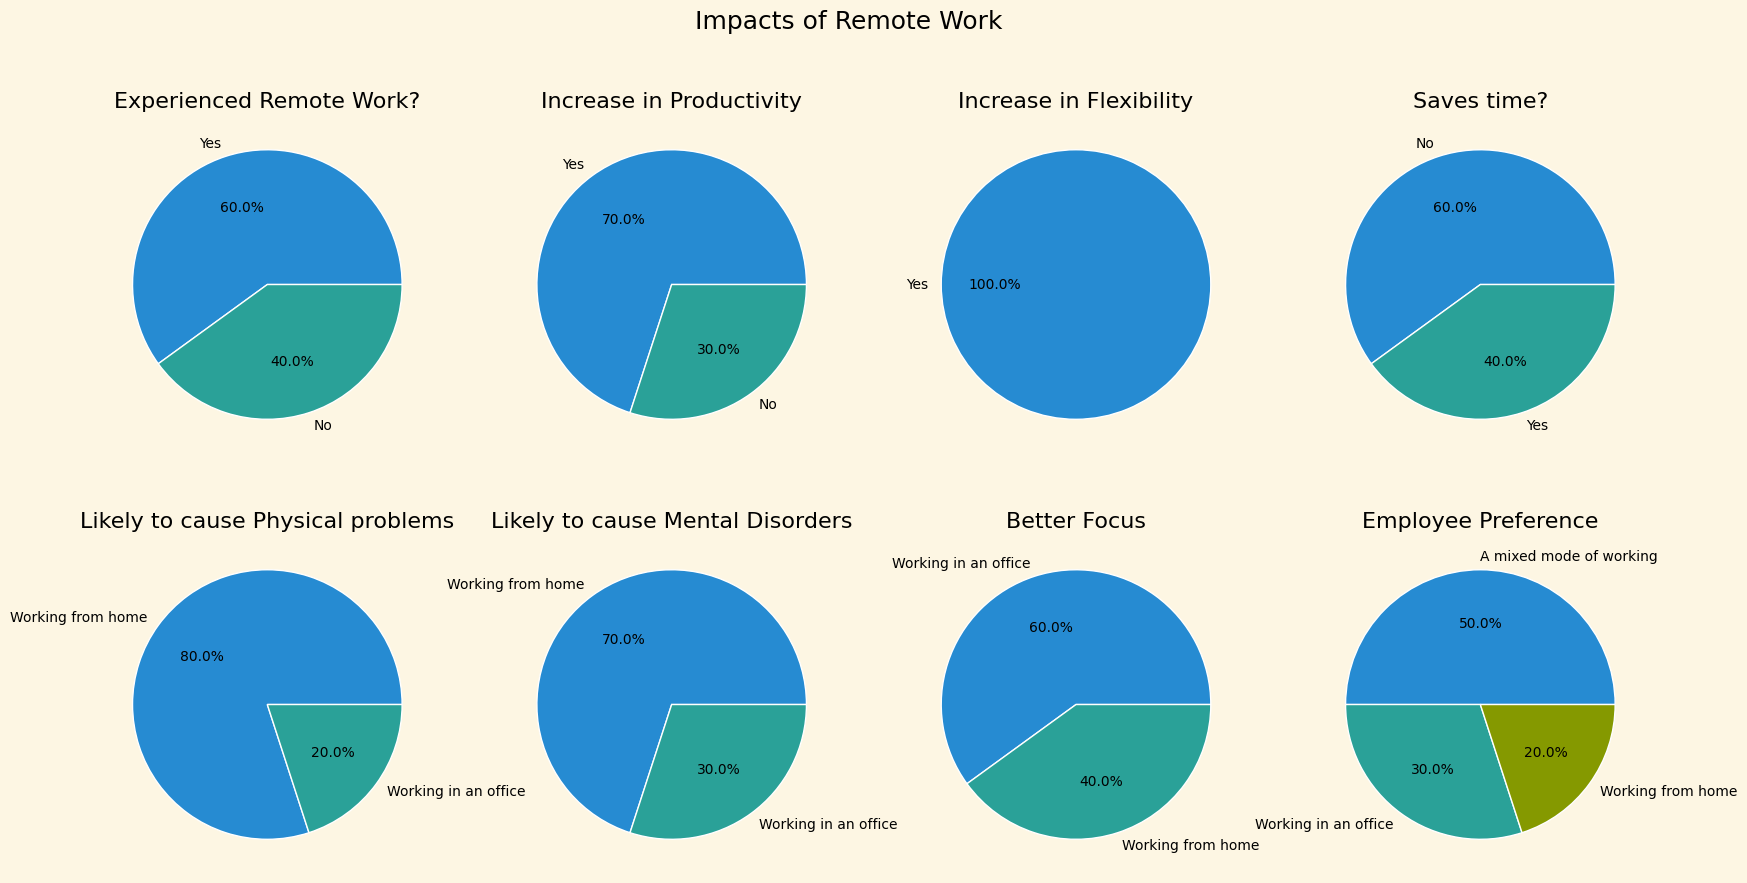

In [33]:
impact_wfh=impacts_df['Have you ever experienced working from home?'].value_counts()
impact_productivity=impacts_df['Do you think that working from home increases your work productivity?'].value_counts()
impact_flexibility=impacts_df['Do you think that working from home gives you more flexibility?'].value_counts()
impact_time=impacts_df['Do you think that working from home saves you more time?'].value_counts()
impact_physical=impacts_df['Which work type has the potential to cause you physical problems, such as the neck, back, and leg pain?'].value_counts()
impact_mental=impacts_df['Which work type has the potential to cause mental disorders, such as stress, anxiety, and depression?'].value_counts()
impact_focus=impacts_df['Which work type keeps you focused while working?'].value_counts()
impact_preference=impacts_df['Which work type do you prefer the most?'].value_counts()


fig,axs=plt.subplots(2,4,figsize=(20,10))
axs[0,0].pie(impact_wfh,labels=impact_wfh.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,0].set_title('Experienced Remote Work?')

axs[0,1].pie(impact_productivity,labels=impact_productivity.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,1].set_title('Increase in Productivity')

axs[0,2].pie(impact_flexibility,labels=impact_flexibility.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,2].set_title('Increase in Flexibility')

axs[0,3].pie(impact_time,labels=impact_time.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0,3].set_title('Saves time?')

axs[1,0].pie(impact_physical,labels=impact_physical.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,0].set_title('Likely to cause Physical problems')

axs[1,1].pie(impact_mental,labels=impact_mental.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,1].set_title('Likely to cause Mental Disorders')

axs[1,2].pie(impact_focus,labels=impact_focus.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,2].set_title('Better Focus')

axs[1,3].pie(impact_preference,labels=impact_preference.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[1,3].set_title('Employee Preference')


plt.suptitle('Impacts of Remote Work',size=18)
plt.show()

Mixed Work

In [34]:
mixed_work_df=pd.read_csv("C:/Users/harsh/OneDrive/Documents/AI/Databases/Remote work analysis/mixed work.csv")
mixed_work_df.head()

,Mixed working style,Mixed working time(in %),Preferred mixed working time(in %),Compulsion to work onsite for sometime,Mandatory onsite work time(in %)
0,Yes,50,80,Yes,40
1,Yes,10,5,Yes,100
2,No,50,50,Yes,20
3,Yes,40,40,Yes,50
4,No,50,50,No,0


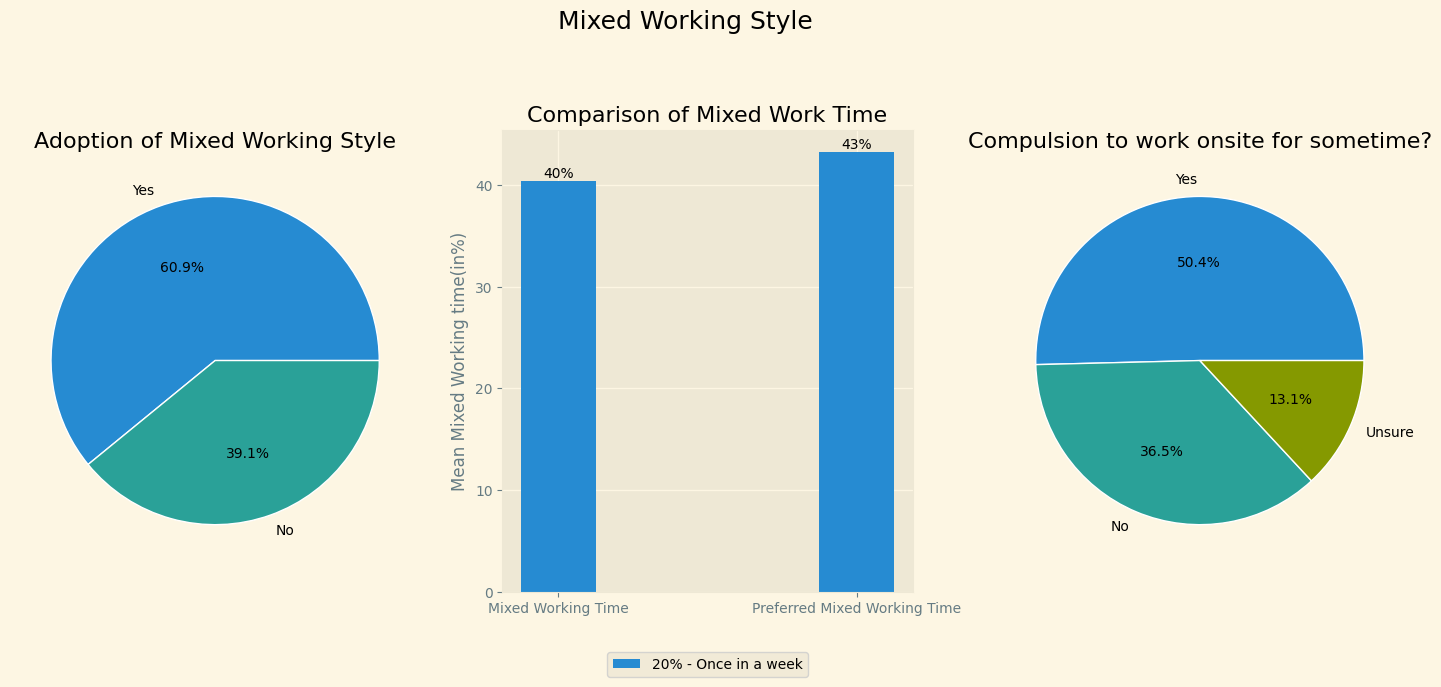

In [35]:
mixed_working_style=mixed_work_df['Mixed working style'].value_counts()
mixed_working_compulsion=mixed_work_df['Compulsion to work onsite for sometime'].value_counts()
mixed_working_time=mixed_work_df[' Mixed working time(in %)'].mean()
preferred_mixed_working_time=mixed_work_df['Preferred mixed working time(in %)'].mean()

fig,axs=plt.subplots(1,3,figsize=(18,6))
axs[0].pie(mixed_working_style,labels=mixed_working_style.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[0].set_title('Adoption of Mixed Working Style')

bars=axs[1].bar(['Mixed Working Time', 'Preferred Mixed Working Time'],[mixed_working_time,preferred_mixed_working_time],width=0.25,label='20% - Once in a week')
axs[1].bar_label(bars, fmt='%d%%', label_type='edge') 
axs[1].set_ylabel('Mean Mixed Working time(in%)')
axs[1].set_title('Comparison of Mixed Work Time')
axs[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

axs[2].pie(mixed_working_compulsion,labels=mixed_working_compulsion.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})
axs[2].set_title('Compulsion to work onsite for sometime?')

plt.suptitle('Mixed Working Style',size=18,y=1.08)
plt.show()

In [40]:
mandatory_onsite=mixed_work_df['Mandatory onsite work time(in %)'].mean()
print("The Average mandatory onsite work time was",int(mandatory_onsite),'%')

The Average mandatory onsite work time was 26 %
